In [ ]:
pip install matplotlib

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt

In [ ]:
recipes = [
    {"title": "Spaghetti Carbonara", "ingredients": ["spaghetti", "egg", "bacon"]},
    {"title": "Egg Fried Rice", "ingredients": ["rice", "egg", "spring onion", "soy sauce"]},
    {"title": "Bacon Sandwich", "ingredients": ["bread", "bacon", "butter"]},
    {"title": "Chicken Curry", "ingredients": ["chicken", "curry powder", "rice", "onion", "tomato"]},
    {"title": "Vegetable Stir Fry", "ingredients": ["bell pepper", "broccoli", "carrot", "soy sauce", "onion"]},
    {"title": "Tomato Soup", "ingredients": ["tomato", "onion", "garlic", "bread"]},
    {"title": "Cheese Omelette", "ingredients": ["egg", "cheese", "butter", "milk"]},
    {"title": "Mushroom Risotto", "ingredients": ["rice", "mushroom", "onion", "white wine", "parmesan"]},
    {"title": "Beef Burger", "ingredients": ["beef patty", "bread bun", "lettuce", "tomato", "onion", "cheese"]},
    {"title": "Tofu Salad", "ingredients": ["tofu", "lettuce", "tomato", "bell pepper", "onion", "olive oil"]},
    {"title": "Fish Tacos", "ingredients": ["fish", "tortilla", "lettuce", "tomato", "onion", "lime"]},
    {"title": "Chicken Alfredo", "ingredients": ["chicken", "pasta", "parmesan", "butter", "garlic"]},
    {"title": "Pepperoni Pizza", "ingredients": ["pizza dough", "tomato sauce", "cheese", "pepperoni"]},
    {"title": "Veggie Pizza", "ingredients": ["pizza dough", "tomato sauce", "bell pepper", "mushroom", "onion", "olive"]},
    {"title": "Chocolate Cake", "ingredients": ["cocoa powder", "flour", "egg", "sugar", "milk"]},
    {"title": "Strawberry Milkshake", "ingredients": ["strawberry", "milk", "sugar", "ice cream"]},
]

Please enter your available ingredients separated by commas (e.g., rice,egg,tomato): rice, egg, tomato

Recommended Recipes
--------------------------------------------------
1. Egg Fried Rice
2. Chicken Curry
3. Spaghetti Carbonara
4. Cheese Omelette
5. Mushroom Risotto
6. Chocolate Cake
7. Tomato Soup
8. Pepperoni Pizza
9. Fish Tacos
10. Tofu Salad
11. Veggie Pizza
12. Beef Burger
--------------------------------------------------
Total recipes available: 16
Number of recipes matching your ingredients: 12
Match percentage: 75.00%


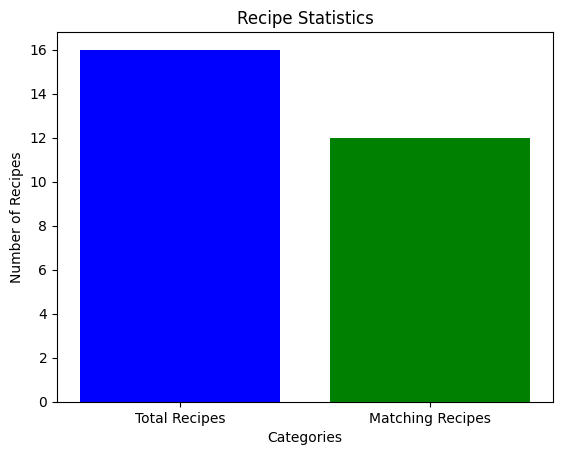

In [ ]:

recipes_str = [' '.join(recipe["ingredients"]) for recipe in recipes]

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(recipes_str)

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def recommend_based_on_ingredients(ingredients_list):
    ingredients_str = ' '.join(ingredients_list)
    ingredients_tfidf = vectorizer.transform([ingredients_str])
    similarity_scores = linear_kernel(ingredients_tfidf, tfidf_matrix).flatten()
    similar_recipes = sorted(list(enumerate(similarity_scores)), key=lambda x: x[1], reverse=True)
    return [recipes[i]["title"] for i, score in similar_recipes if score > 0]

def get_user_ingredients():
    """
    Get a list of ingredients from the user.
    """
    user_input = input("Please enter your available ingredients separated by commas (e.g., rice,egg,tomato): ")
    ingredients_list = [ingredient.strip() for ingredient in user_input.split(",")]
    return ingredients_list

def display_recommendations(recommended_recipes):
    """
    Display the recommended recipes in a table format with statistics.
    """
    total_recipes = len(recipes)
    total_recommended = len(recommended_recipes)
    match_percentage = (total_recommended / total_recipes) * 100

    if not recommended_recipes:
        print("No recommended recipes found for the given ingredients.")
        return

    print("\nRecommended Recipes")
    print("-" * 50)


    for idx, recipe in enumerate(recommended_recipes, 1):
        print(f"{idx}. {recipe}")


    print("-" * 50)
    print(f"Total recipes available: {total_recipes}")
    print(f"Number of recipes matching your ingredients: {total_recommended}")
    print(f"Match percentage: {match_percentage:.2f}%")


    labels = ['Total Recipes', 'Matching Recipes']
    values = [total_recipes, total_recommended]

    plt.bar(labels, values, color=['blue', 'green'])
    plt.xlabel('Categories')
    plt.ylabel('Number of Recipes')
    plt.title('Recipe Statistics')
    plt.show()

available_ingredients = get_user_ingredients()
recommended_recipes = recommend_based_on_ingredients(available_ingredients)
display_recommendations(recommended_recipes)
